# bulbea
> Deep Learning based Python Library for Stock Market Prediction and Modelling

![](bulbea.png)

A canonical way of importing the `bulbea` module is as follows:

In [1]:
import bulbea as bb

### `bulbea.Share`

In order to analyse a desired share, we use the `Share` object defined under `bulbea` which considers 2 arguments - *the **source code** for the economic data* and *the **ticker symbol** for a said company*.

In [2]:
source, ticker = 'YAHOO', 'GOOGL'

Go ahead and create a `Share` object as follows:

In [3]:
share = bb.Share(source, ticker)

By default, a `Share` object for a said source and symbol provides you historical data since a company's inception, as a `pandas.DataFrame` object. In order to access the same, use the `Share` object's member variable - `data` as follows:

In [4]:
data     = share.data
nsamples = 5
data.tail(nsamples)

,Open,High,Low,Close,Volume,Adjusted Close
Date,,,,,,
2017-03-07,847.260010,853.330017,845.520020,851.150024,1029500.0,851.150024
2017-03-08,853.119995,856.929993,851.250000,853.640015,1028800.0,853.640015
2017-03-09,853.690002,860.710022,852.669983,857.840027,1340500.0,857.840027
2017-03-10,862.700012,864.229980,857.609985,861.409973,1335200.0,861.409973
2017-03-13,860.830017,867.130005,860.820007,864.580017,1164800.0,864.580017


In order to analyse a given attribute, you could plot the same as follows:

In [5]:
figsize = (20, 15)

% matplotlib inline

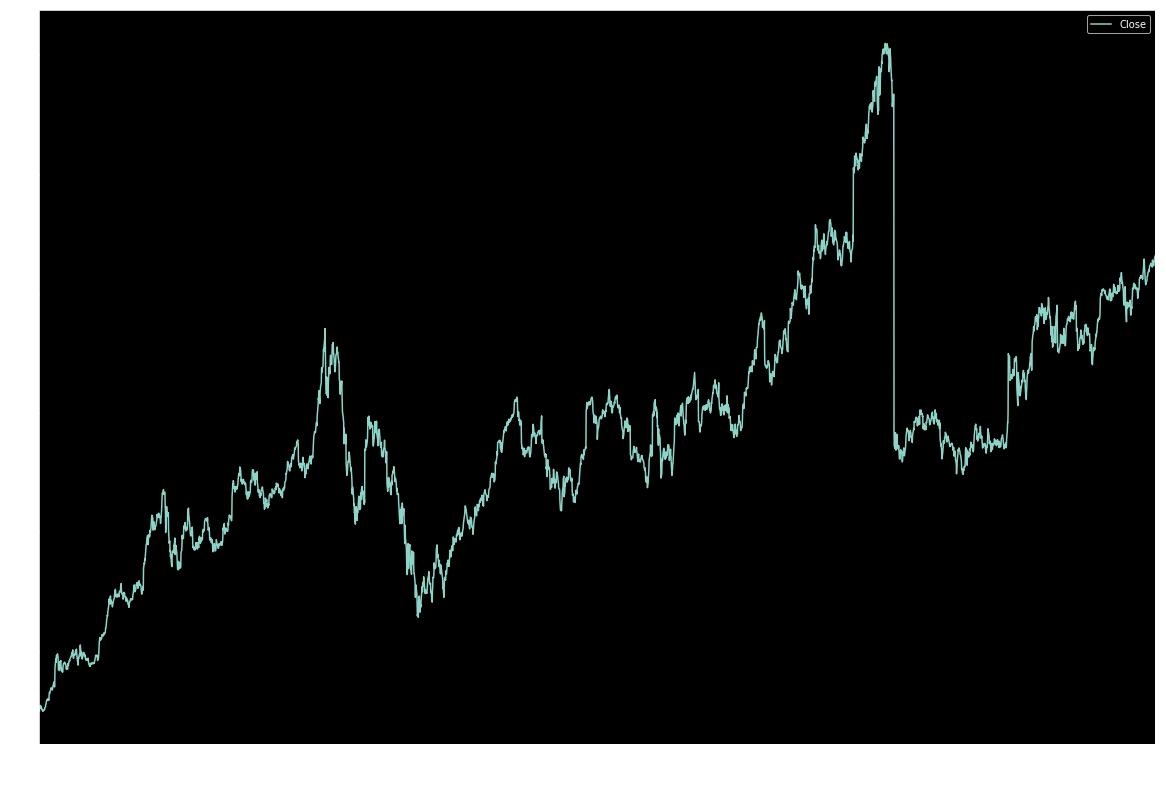

In [6]:
share.plot(figsize = figsize)

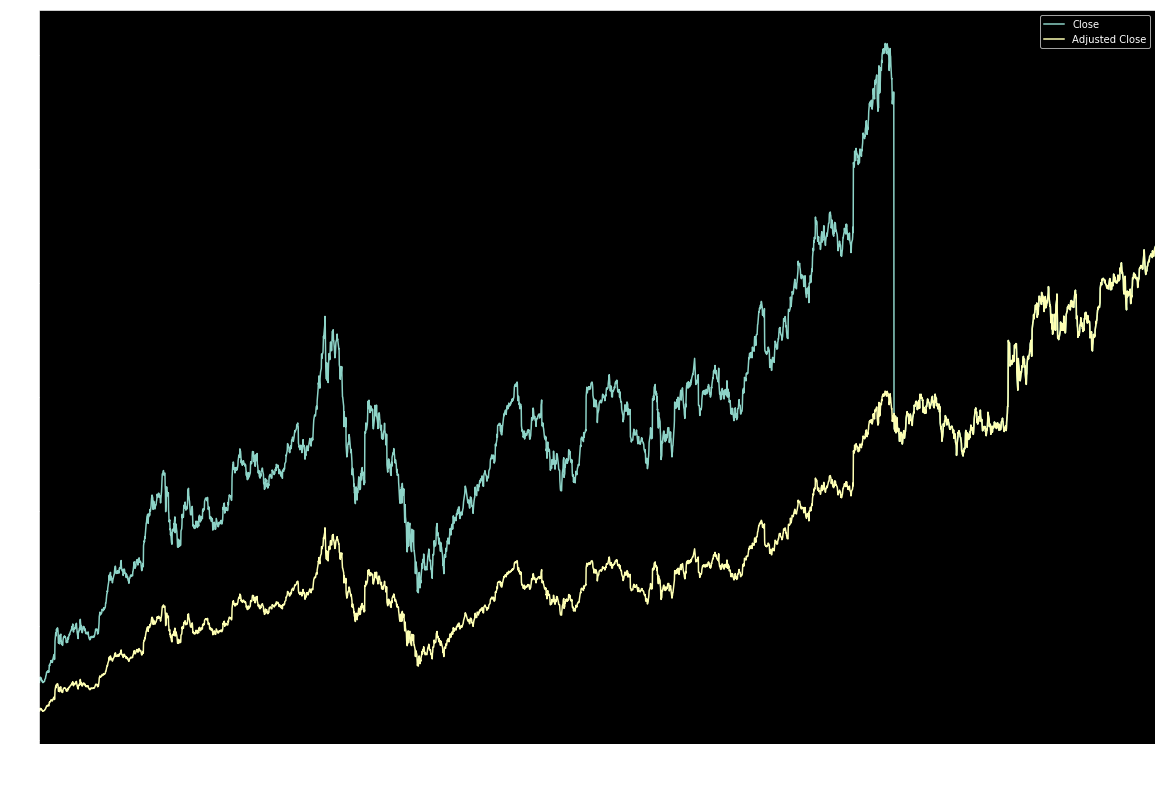

In [7]:
share.plot(['Close', 'Adjusted Close'], figsize = figsize)

### Statistics

#### Global Mean
In order to plot the **global mean** of the stock, we could do the same as follows:

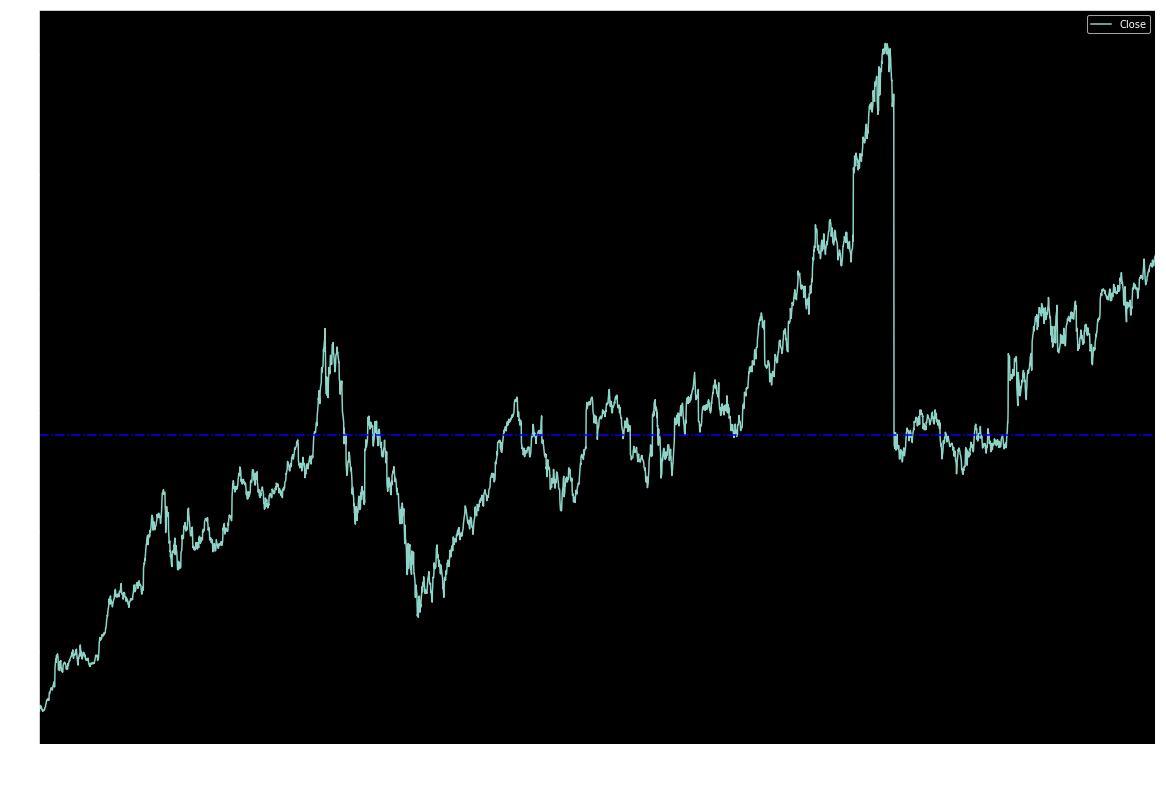

In [8]:
share.plot(figsize = (20, 15), global_mean = True)

#### Moving Averages and Bollinger Bands (R)

In [9]:
bands = share.bollinger_bands(period = 1, bandwidth = 2)
bands.head(nsamples)

,Lower (Close),Mean (Close),Upper (Close)
Date,,,
2004-08-19,NaN,100.339998,NaN
2004-08-20,NaN,108.310002,NaN
2004-08-23,NaN,109.399998,NaN
2004-08-24,NaN,104.870002,NaN
2004-08-25,NaN,106.000005,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b2bd059b0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f1b2b3d91d0>], dtype=object)

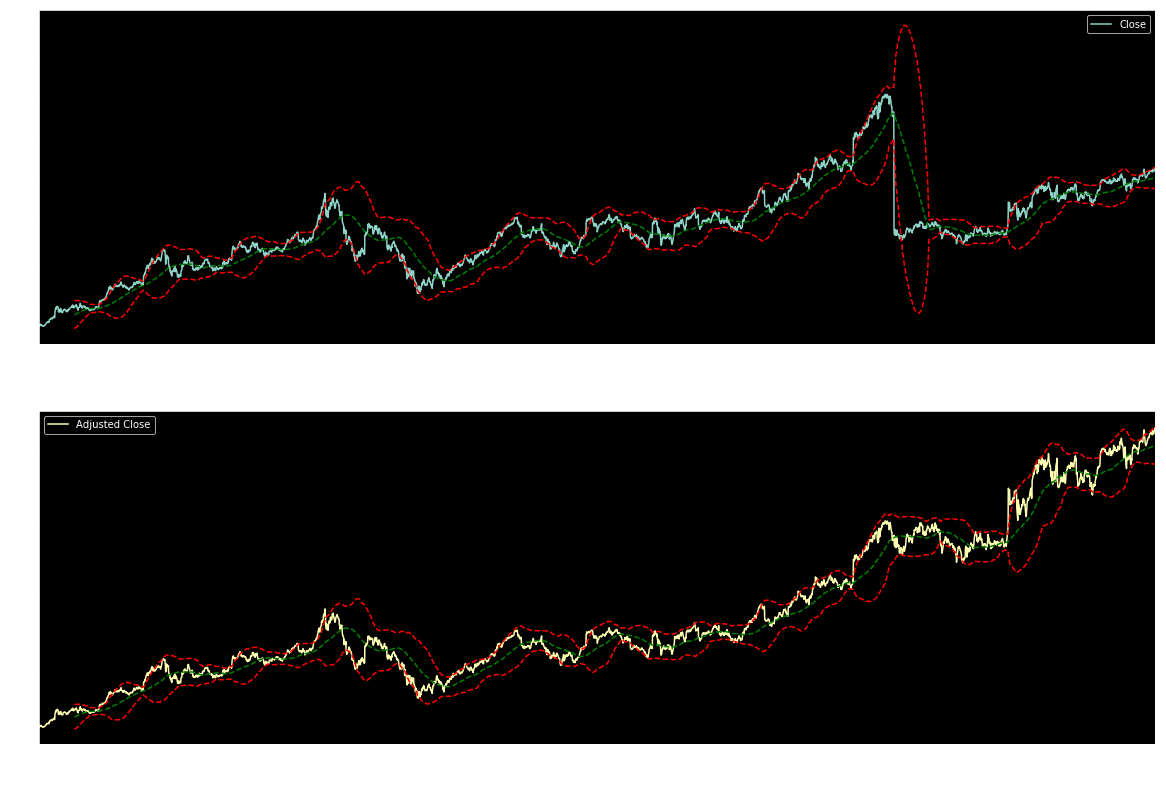

In [10]:
share.plot(['Close', 'Adjusted Close'], figsize = (20, 15), bollinger_bands = True, period = 100, bandwidth = 2)

### Training & Testing

In [10]:
from bulbea.learn.evaluation import split

In [11]:
Xtrain, Xtest, ytrain, ytest = split(share, 'Close', normalize = True)

In [12]:
import numpy as np

In [13]:
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 1))
Xtest  = np.reshape(Xtest,  ( Xtest.shape[0],  Xtest.shape[1], 1))

### Modelling

In [14]:
layers      = [1, 100, 100, 1] # number of neurons in each layer
nbatch      = 512              
epochs      = 1                
nvalidation = 0.05

In [15]:
from bulbea.learn.models import RNN
from bulbea.learn.models.ann import RNNCell

Using TensorFlow backend.


In [16]:
rnn = RNN(layers, cell = RNNCell.LSTM)

#### TRAINING

In [17]:
rnn.fit(Xtrain, ytrain,
        batch_size       = nbatch,
        nb_epoch         = epochs,
        validation_split = nvalidation)

Train on 1785 samples, validate on 94 samples
Epoch 1/1
1785/1785 [==============================] - 1s - loss: 0.0241 - val_loss: 0.0018


#### TESTING

In [18]:
predicted = rnn.predict(Xtest)

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
mean_squared_error(ytest, predicted)

0.0028142895602167378

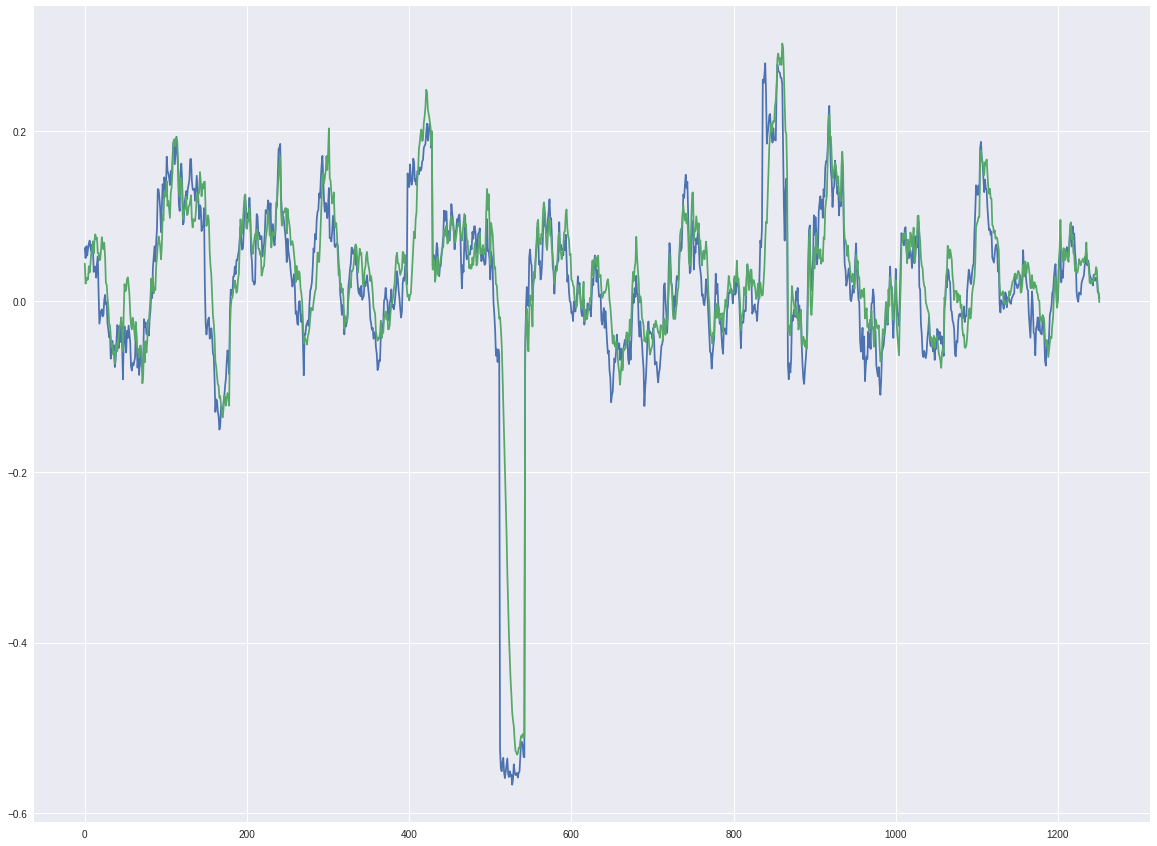

In [21]:
import matplotlib.pyplot as pplt

figsize   = (20, 15)
figure    = pplt.figure(figsize = figsize)

axes      = figure.add_subplot(111)
axes.plot(ytest)
axes.plot(predicted)

### Sentiment Analysis

In [ ]:
s = bb.sentiment(share)
s